# PyTorch
Computing the gradient of the loss function for neural networks of more that a few layers, that is a function in which each layer is represented as a nested function of multiple parameters cannot be done with the same algorithm used for our two-layer network based on numerical differentiation. One problem is that the number of calculations increases quickly by adding layers and units within each layer. Another problem is the vanishing values of the derivatives and the limit of [floating-point arithmetic](https://en.wikipedia.org/wiki/Floating-point_arithmetic) used to represent numbers in computer systems. The first problem can be solved using the GPUs, a special hardware that can perform algebric computations in parallel. The second problem can be addressed by using better algorithms. [PyTorch](https://pytorch.org/) is a Python port of [Torch](http://torch.ch/) a software library that implements an automatic differentiation algorithm using CPUs or GPUs. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import torch
warnings.filterwarnings('ignore')
print("NumPy version: %s"%np.__version__)
print("Pandas version: %s"%pd.__version__)
print("PyTorch version: %s"%torch.__version__)

NumPy version: 1.23.1
Pandas version: 1.4.3
PyTorch version: 1.13.0


## PyTorch Tensor
A tensor in PyTorch is a data structure to represent multidimensional arrays. The data can be loaded into a PyTorch tensor from a Python list or a NumPy array.

In [29]:
t = torch.tensor([1.2, 3.5, 0.7])
t

tensor([1.2000, 3.5000, 0.7000])

In [30]:
a = np.array([[2.3, 5.6], [1.0, 2.1]])
t = torch.tensor(a)
t

tensor([[2.3000, 5.6000],
        [1.0000, 2.1000]], dtype=torch.float64)

## PyTorch DataLoader
The PyTorch DataLoader is a class that provides many functions to load, iterate, shuffle and split a data set in batches.

In [20]:
from torch.utils.data import DataLoader

data_loader = DataLoader(np.arange(6, dtype=float))

for item in data_loader:
    print(item)

tensor([0.], dtype=torch.float64)
tensor([1.], dtype=torch.float64)
tensor([2.], dtype=torch.float64)
tensor([3.], dtype=torch.float64)
tensor([4.], dtype=torch.float64)
tensor([5.], dtype=torch.float64)


In [28]:
data_loader = DataLoader(torch.arange(6, dtype=float), batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.], dtype=torch.float64)
batch 2: tensor([3., 4., 5.], dtype=torch.float64)


In [32]:
import pathlib

imgdir_path = pathlib.Path('images/cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['images\\cat_dog_images\\cat-01.jpg', 'images\\cat_dog_images\\cat-02.jpg', 'images\\cat_dog_images\\cat-03.jpg', 'images\\cat_dog_images\\dog-01.jpg', 'images\\cat_dog_images\\dog-02.jpg', 'images\\cat_dog_images\\dog-03.jpg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


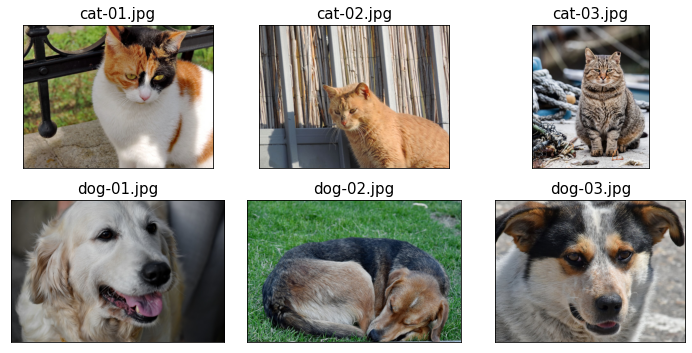

In [34]:
import os
from PIL import Image

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
plt.tight_layout()
plt.show()

In [35]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [37]:
from torch.utils.data import Dataset

class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]      
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)

In [39]:
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

images\cat_dog_images\cat-01.jpg 0
images\cat_dog_images\cat-02.jpg 0
images\cat_dog_images\cat-03.jpg 0
images\cat_dog_images\dog-01.jpg 1
images\cat_dog_images\dog-02.jpg 1
images\cat_dog_images\dog-03.jpg 1


In [40]:
import torchvision.transforms as transforms

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])        
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)

In [41]:
img_height, img_width = 80, 120
    
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])
    
image_dataset = ImageDataset(file_list, labels, transform)

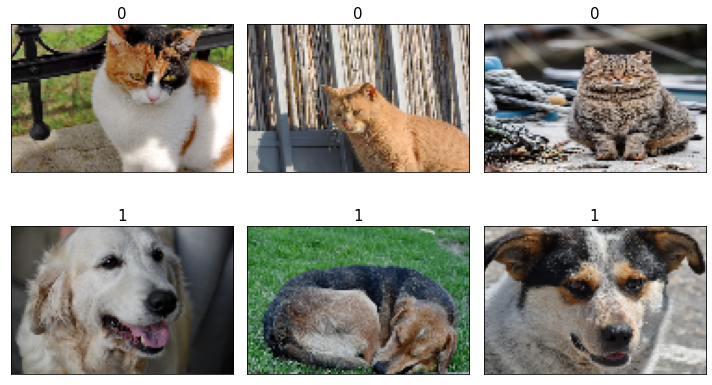

In [42]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)
    
plt.tight_layout()
plt.show()

## Fetching available data sets

(<PIL.Image.Image image mode=L size=28x28 at 0x22A6DC9FA90>, 5)


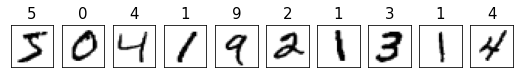

In [117]:
import torchvision
from itertools import islice

image_path = 'data/'
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=False)

assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(9, 5))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

plt.show()